In [ ]:
import pandas as pd

def get_step_occurrences(csv_file):
  df= pd.read_csv(csv_file)
  return df


In [ ]:
df_evoavalla = get_step_occurrences("step_occurrences.csv")
df_evoavalla

,AsmSpec,Scenario,Steps
0,Ascensore,1,4
1,Ascensore,2,2
2,Certifier_nochoose_noundef,1,7
3,Certifier_nochoose_noundef,2,9
4,Certifier_nochoose_noundef,3,6
...,...,...,...
57,SiGistica,3,1
58,SiGistica,4,2
59,Stufa,1,1
60,TrafficLightv2,1,15


In [ ]:
df_atgt = get_step_occurrences("step_occurrences_atgt.csv")
df_atgt

,AsmSpec,Scenario,Steps
0,Ascensore,1,0
1,Ascensore,2,0
2,Ascensore,3,3
3,Ascensore,4,3
4,Ascensore,5,2
...,...,...,...
99,SIS,4,5
100,SIS,5,0
101,SIS,6,3
102,SIS,7,5


In [ ]:
commons_asmSpec_names = set(df_evoavalla["AsmSpec"]).intersection(set(df_atgt["AsmSpec"]))
commons_asmSpec_names

{'Ascensore',
 'Certifier_nochoose_noundef',
 'Forno',
 'Phd_master_flat2_v1',
 'Pillbox_1'}

In [ ]:
commons_evoavalla_dataframe = df_evoavalla[df_evoavalla["AsmSpec"].isin(commons_asmSpec_names)]
commons_atgt_dataframe = df_atgt[df_atgt["AsmSpec"].isin(commons_asmSpec_names)]

In [ ]:
commons_evoavalla_dataframe_grouped = commons_evoavalla_dataframe.groupby("AsmSpec").agg({'Scenario': 'max', 'Steps': 'mean'})
commons_evoavalla_dataframe_grouped

,Scenario,Steps
AsmSpec,,
Ascensore,2,3.000000
Certifier_nochoose_noundef,7,4.857143
Forno,3,2.000000
Phd_master_flat2_v1,24,2.166667
Pillbox_1,3,4.666667


In [ ]:
commons_atgt_dataframe_grouped = commons_atgt_dataframe.groupby("AsmSpec").agg({'Scenario': 'max', 'Steps': 'mean'})
commons_atgt_dataframe_grouped

,Scenario,Steps
AsmSpec,,
Ascensore,7,1.571429
Certifier_nochoose_noundef,30,4.633333
Forno,4,2.500000
Phd_master_flat2_v1,34,2.205882
Pillbox_1,21,1.666667


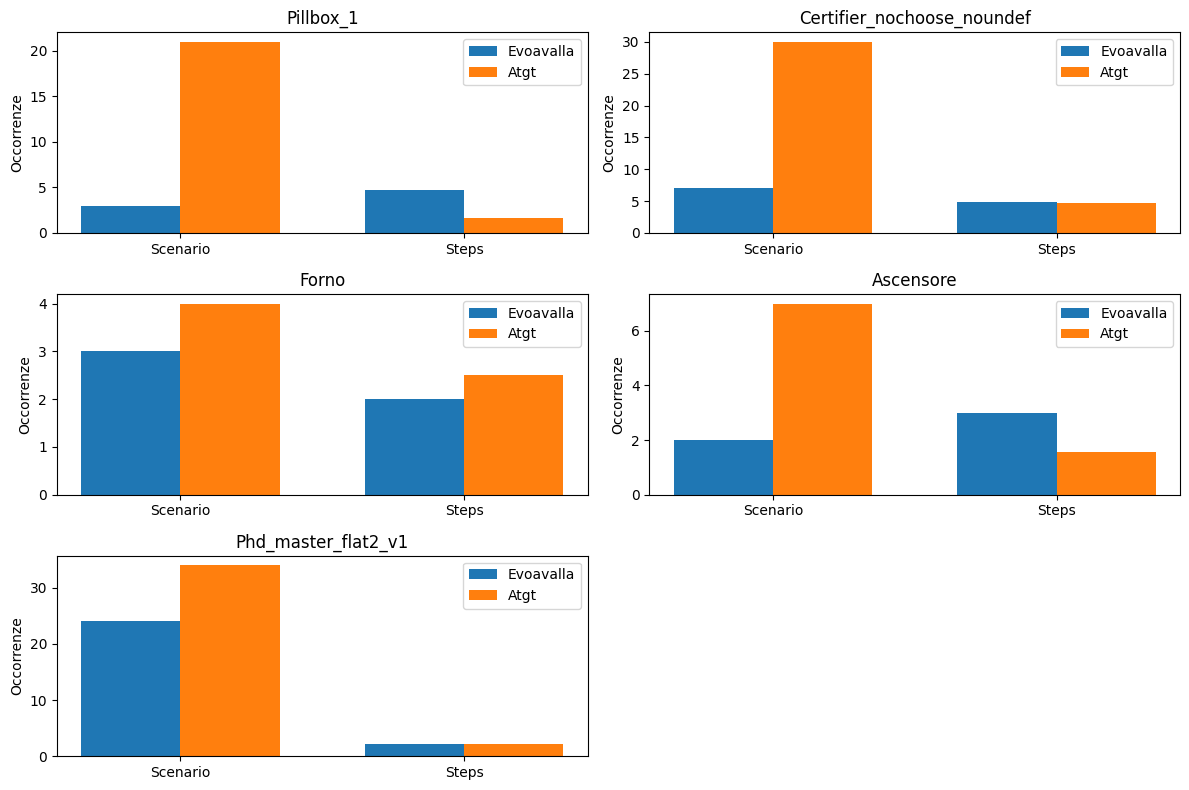

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_plots = len(commons_asmSpec_names)
num_cols = 2  # Number of columns in the grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))  # Adjust figsize as needed

axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, asm_spec in enumerate(commons_asmSpec_names):
    evoavalla_data = commons_evoavalla_dataframe_grouped.loc[asm_spec]
    atgt_data = commons_atgt_dataframe_grouped.loc[asm_spec]

    scenarios = ['Scenario', 'Steps']
    evoavalla_values = [evoavalla_data['Scenario'], evoavalla_data['Steps']]
    atgt_values = [atgt_data['Scenario'], atgt_data['Steps']]

    x = np.arange(len(scenarios))
    width = 0.35

    ax = axes[i]  # Get the current subplot axis

    rects1 = ax.bar(x - width/2, evoavalla_values, width, label='Evoavalla')
    rects2 = ax.bar(x + width/2, atgt_values, width, label='Atgt')

    ax.set_ylabel('Occorrenze')
    ax.set_title(f'{asm_spec}')
    ax.set_xticks(x)
    ax.set_xticklabels(scenarios)
    ax.legend()

# Remove empty subplots if any
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

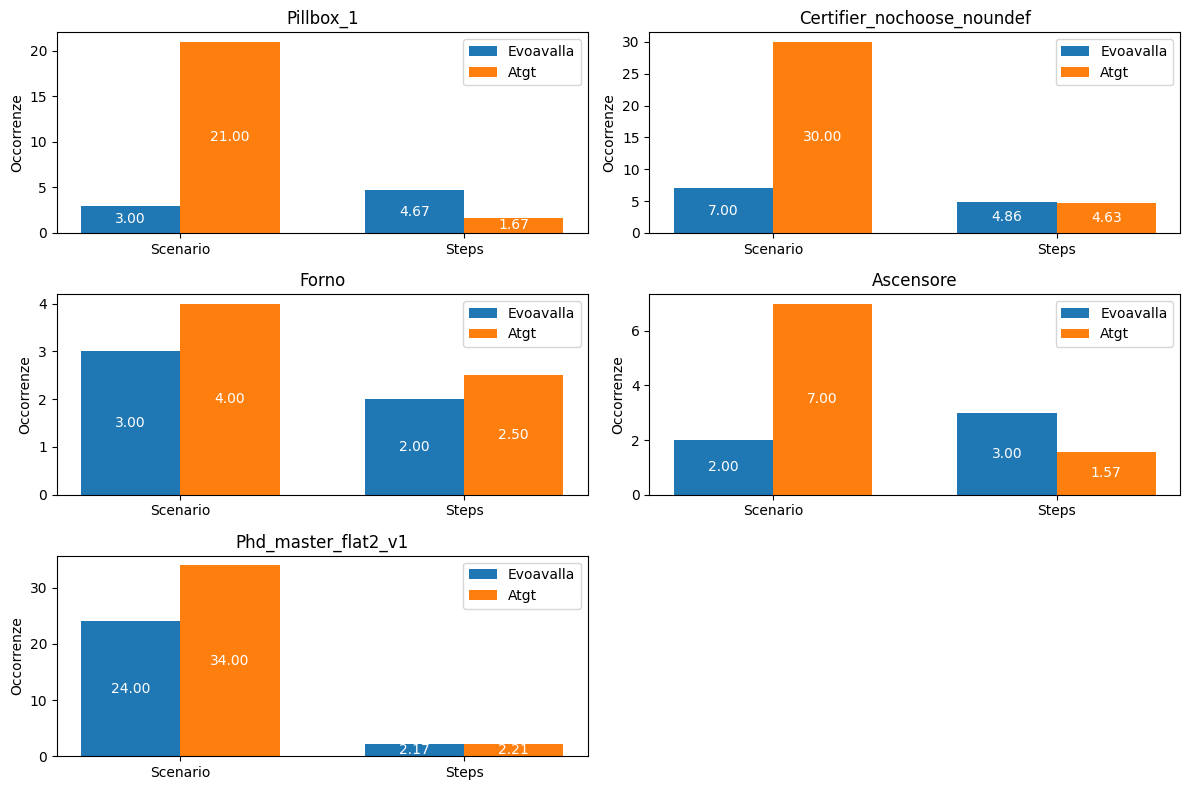

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_plots = len(commons_asmSpec_names)
num_cols = 2  # Number of columns in the grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))  # Adjust figsize as needed

axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, asm_spec in enumerate(commons_asmSpec_names):
    evoavalla_data = commons_evoavalla_dataframe_grouped.loc[asm_spec]
    atgt_data = commons_atgt_dataframe_grouped.loc[asm_spec]

    scenarios = ['Scenario', 'Steps']
    evoavalla_values = [evoavalla_data['Scenario'], evoavalla_data['Steps']]
    atgt_values = [atgt_data['Scenario'], atgt_data['Steps']]

    x = np.arange(len(scenarios))
    width = 0.35

    ax = axes[i]  # Get the current subplot axis

    rects1 = ax.bar(x - width/2, evoavalla_values, width, label='Evoavalla')
    rects2 = ax.bar(x + width/2, atgt_values, width, label='Atgt')

    ax.set_ylabel('Occorrenze')
    ax.set_title(f'{asm_spec}')
    ax.set_xticks(x)
    ax.set_xticklabels(scenarios)
    ax.legend()

    # Add values on the bars
    for rect in rects1 + rects2:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height/2,  # Updated y position
                f'{height:.2f}', ha='center', va='center', color='white') # Updated color

# Remove empty subplots if any
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()